In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [12]:
mp = pd.read_csv('~/Desktop/To_prediction/ESCO_all_pheno_MTX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acetomicrobium_hydrogeniformans,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_950,s__esco_HumanRef_tmp_v1.0.1_951,s__esco_HumanRef_tmp_v1.0.1_96,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_998,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5MCVN,0.003,0.000,0.001,0.000,0.000,0.000,0.003,0.000,0.0,1.195,...,0.000,0.002,0.001,0.000,0.001,0.000,0.067,0.000,1.162,CD
CSM5MCW6,0.002,0.000,0.007,0.016,0.000,0.000,0.214,0.001,0.0,0.000,...,0.001,0.000,0.000,0.001,0.001,0.000,2.994,0.001,0.004,CD
CSM5MCWC,0.000,0.001,0.172,0.000,0.002,0.000,0.005,0.008,0.0,0.001,...,0.001,0.000,0.013,0.000,0.001,0.000,0.000,0.005,0.001,CD
CSM5MCWE,0.000,0.000,0.158,0.000,0.001,0.000,0.004,0.008,0.0,0.001,...,0.000,0.000,0.026,0.001,0.003,0.000,0.000,0.020,0.000,CD
CSM5MCXD,0.002,0.001,0.002,0.008,0.001,0.000,0.008,0.001,0.0,0.001,...,0.000,0.001,0.000,0.000,0.001,0.000,0.126,0.003,0.708,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J1A8,0.000,0.001,0.745,0.007,0.001,0.000,0.000,0.003,0.0,0.004,...,0.000,0.001,0.077,0.001,0.006,0.006,0.000,0.000,0.000,Control
PSMA265F,0.000,0.002,0.017,0.368,0.001,0.000,0.004,0.000,0.0,0.001,...,0.000,0.000,0.002,0.000,0.003,0.001,0.000,0.003,0.000,Control
PSMA265H,0.000,0.004,0.021,0.351,0.001,0.000,0.005,0.000,0.0,0.002,...,0.000,0.000,0.003,0.000,0.003,0.001,0.000,0.002,0.000,Control


In [13]:
select_sampels_MTX = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels_MTX = select_sampels_MTX.set_index('External ID')
select_sampels_MTX.drop("Participant ID", inplace=True, axis=1)
select_sampels_MTX

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,12.70000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19F,263.01820,CD
PSM7J19N,13.47861,nonIBD
PSM7J17X,16.97915,nonIBD


In [14]:
mp = mp.loc[select_sampels_MTX.index,:]
mp["diagnosis"] = select_sampels_MTX.iloc[:,-1]
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acetomicrobium_hydrogeniformans,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_951,s__esco_HumanRef_tmp_v1.0.1_96,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_998,Diagnosis,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,0.001,0.001,0.002,0.011,0.001,0.000,0.010,0.001,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.069,0.000,0.695,CD,CD
CSM5MCVN,0.003,0.000,0.001,0.000,0.000,0.000,0.003,0.000,0.000,1.195,...,0.002,0.001,0.000,0.001,0.000,0.067,0.000,1.162,CD,CD
CSM67UBZ,0.009,0.000,0.004,0.043,0.000,0.000,0.001,0.000,0.000,0.366,...,0.001,0.000,0.000,0.001,0.001,0.597,0.003,0.008,UC,UC
CSM5MCXL,0.004,0.002,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.001,...,0.000,0.000,0.000,0.001,0.000,0.026,0.002,0.238,UC,UC
CSM5MCY8,0.001,0.003,0.010,0.019,0.000,0.000,0.003,0.001,0.001,0.001,...,0.000,0.002,0.000,0.005,0.001,0.289,0.010,0.011,UC,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19F,0.017,0.000,0.008,0.115,0.005,0.000,0.002,0.001,0.000,0.079,...,0.001,0.005,0.000,0.007,0.042,0.014,0.001,0.157,CD,CD
PSM7J19N,0.002,0.000,0.001,0.001,0.020,0.011,0.203,0.214,0.000,0.001,...,0.001,0.043,0.000,0.005,0.026,0.005,0.000,0.069,Control,nonIBD
PSM7J17X,0.000,0.000,0.243,0.001,0.002,0.000,0.005,0.001,0.000,0.040,...,0.000,0.035,0.000,0.004,0.000,0.001,0.000,0.000,Control,nonIBD


In [15]:
MTX_X = mp.iloc[:,1:1236]
MTX_y = mp.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

Best Model:
RandomForestClassifier(max_features=4, min_samples_split=5, n_estimators=50,
                       random_state=42)


<AxesSubplot:>

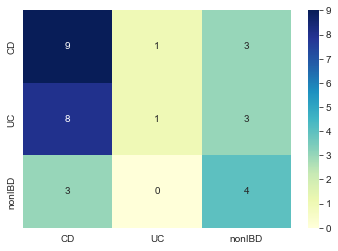

In [16]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [17]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, RF_predictions))

Accuracy 0.4375
